## Ejemplo de Análisis Exploratorio de Datos en Python
El dataset que vamos analizar contiene registros de pacientes con síntomas de problemas cardíacos. Se tienen los datos provenientes bases de datos de enfermedades del corazón, provenientes de diferentes centros médicos:

- Cleveland Clinic Foundation
- Hungarian Institute of Cardiology, Budapest
- University Hospital, Zurich, & University Hospital, Basel, Switzerland

Los campos del dataset son los siguientes:

1. ciudad: ciudad del paciente (Cleveland, Hungria, Suiza)
2. edad: en años
3. sexo: "1"=hombre, "0"=mujer
4. tipo_dolor: tipo de dolor de pecho ("1"=angina típico, "2"=angina atípico, "3"=dolor no de angina, "4"=sin síntoma de dolor)
5. presion: presión de la sangre en reposo (en mm/Hg, en el momento de admisión al hospital)
6. colesterol: en densidad del colesterol (en mg/dl)
7. azucar: indica si el nivel de azucar en la sangre en ayunas es superior a 120 mg/dl ("1") o no ("0")
8. ecg: resultado el electro cardiograma ("0"=normal, "1"=anormalidad del nivel de ST, "2"=hipertrofía ventricular probable)
9. pulso: frecuencia cardiaca máxima alcanzada
10. angina: si se induce a una angina a través del ejercicio ("1") o no ("0")
11. st: diferencia relativa entre el nivel de ST inducido por el ejercicio comparado con el nivel del reposo.
12. pendiente: la pendiente de llegada al máximo del nivel ST durante el ejercicio ("1"creciente, "2"=plana, "3"=decreciente)
13. venas: número de venas coloreadas a partir de la fluorescopia (0 a 3)
14. thal: tipo de defecto (valores aceptados 3=normal, 4=defecto arreglado, 7=defecto reversible)
15. target: indica si en efecto el paciente presenta una enfermedad cardiaca ("1", "2", "3", "4") o no ("0")

### Entendimiento de los datos, limpieza
El archivo "DatosCorazon.csv" contiene el dataset que a analizar.

Vamos a realizar un análisis exploratorio de los datos estableciendo el baseline, verificando la calidad de los datos (tipos de las variables, valores inválidos, excepciones, valores faltantes, etc.), utilizando gráficos para poder entender las distribuciones de los datos e identificar posibles problemas.



### 1 Carga y baselines pre-limpieza de datos

In [1]:
import pandas as pd #tratamiento de datos
import numpy as np #operaciones matriciales y con vectores
import matplotlib.pyplot as plt #gráficos
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Cargamos los datos en memoria y visualizamos los datos iniciales y resumidos.

In [2]:
data = pd.read_csv('DatosCorazon.csv',sep=";",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


Los campos no vienen con los encabezados, por lo que los especificamos directamente



In [3]:
colnames = ["ciudad", "edad", "sexo", "tipo_dolor", "presion", "colesterol", "azucar", "ecg", "pulso", "angina", 
         "st", "pendiente", "venas", "thal", "target"]
data.columns=colnames
data.head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


Observamos la distribución de categorías de la variable objetivo. Utilizamos un countplot.

<Axes: xlabel='target', ylabel='count'>

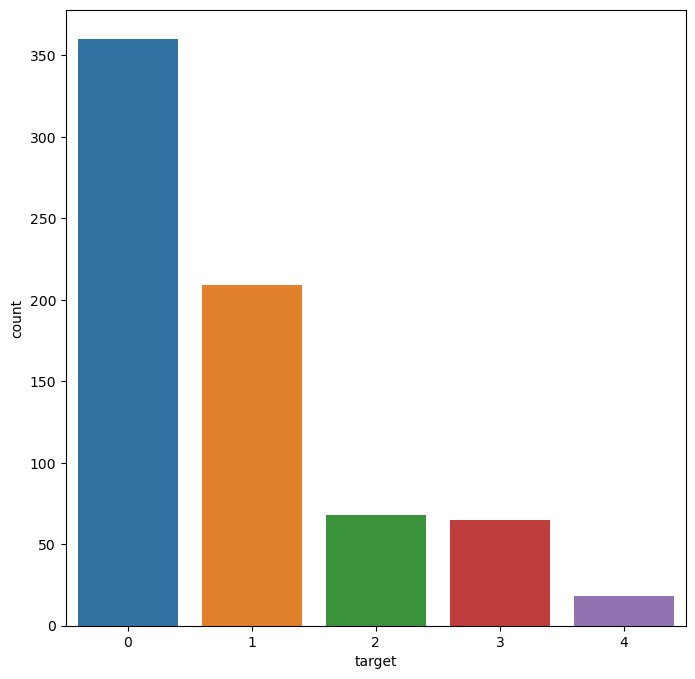

In [4]:
plt.figure(figsize=(8,8))
sns.countplot(x="target", data=data)


Vemos cantidad de observaciones por categoría de la variable objetivo haciendo uso de un cross tabulation.

In [5]:
pd.crosstab(index=data["target"], columns="count")


col_0,count
target,
0,360
1,209
2,68
3,65
4,18


Vamos a arreglar la variable objetivo. Para ello primero establecemos los 2 valores posibles. Modificamos reemplazando los 4 valores que se considerarán como positivos. Vamos a convertir todas aquellas observaciones con variable objetivo positiva como 1 (de todas las filas que tienen asignadas un valor mayor de cero para la variable objetivo, le asignamos al target el valor de 1).

In [7]:
data.loc[(data.target > 0), "target"] = 1

### Baseline global
Revisamos de nuevo, a partir del cambio, la distribución de las dos categorías de la variable objetivo.

<Axes: xlabel='target', ylabel='count'>

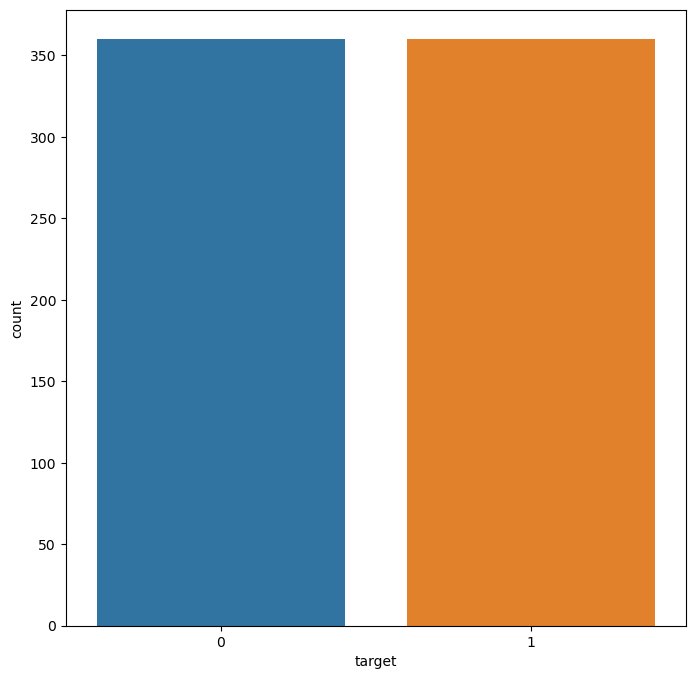

In [8]:

plt.figure(figsize=(8,8))
sns.countplot(x='target',data=data)


Revisamos los tipos de las variables (independientes y dependiente)

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ciudad      720 non-null    object 
 1   edad        720 non-null    float64
 2   sexo        720 non-null    int64  
 3   tipo_dolor  720 non-null    int64  
 4   presion     720 non-null    object 
 5   colesterol  720 non-null    object 
 6   azucar      720 non-null    object 
 7   ecg         720 non-null    object 
 8   pulso       720 non-null    object 
 9   angina      720 non-null    object 
 10  st          720 non-null    object 
 11  pendiente   720 non-null    object 
 12  venas       720 non-null    object 
 13  thal        720 non-null    object 
 14  target      720 non-null    int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 84.5+ KB


La variable objetivo debería ser categórica, por tal razón hacemos la conversión

In [10]:
data.target = data.target.astype(str)

Revisamos la catidad de positivos y negativos de la variable objetivo



In [11]:
pd.crosstab(index=data["target"], columns="count")

col_0,count
target,
0,360
1,360


Vemos la cantidad de registros y variables presentes en el dataframe

In [12]:
data.shape

(720, 15)

### Baseline
Calculamos el baseline (la clase mayoritaria). Como hay la misma cantidad de positivos que negativos simplemente escogemos cualquiera de las dos categorías, contamos cuántos registros de ellas hay, dividimos por el total de filas y multiplicamos por 100 para que nos quede el porcentaje de la clase mayoritaria.



In [13]:
data['target'][data['target'] == '0'].count()/data.shape[0]*100


50.0

Observamos que el baseline global es de 50%, con las dos clases igualmente representadas en perfecto balance.

### Baseline por ciudad


<Axes: xlabel='ciudad', ylabel='count'>

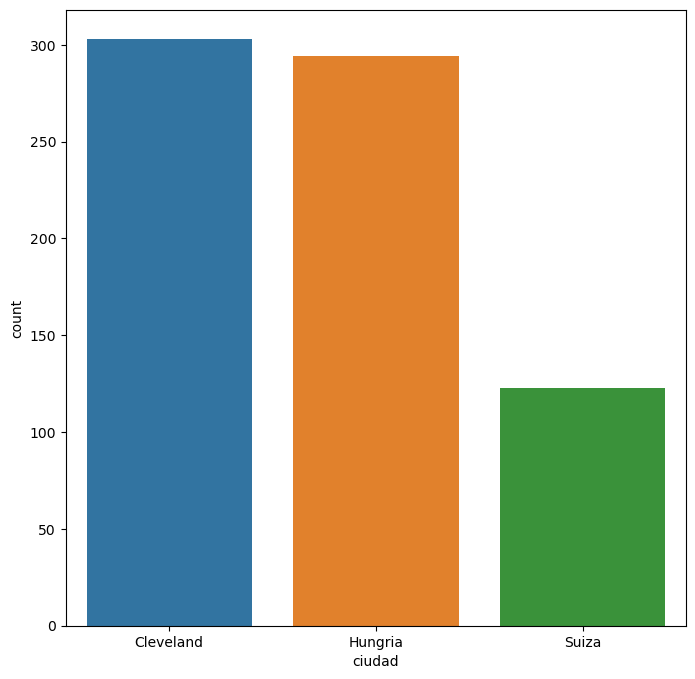

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(x='ciudad',data=data)

In [16]:
pd.crosstab(index=data['ciudad'],columns='count')


col_0,count
ciudad,
Cleveland,303
Hungria,294
Suiza,123


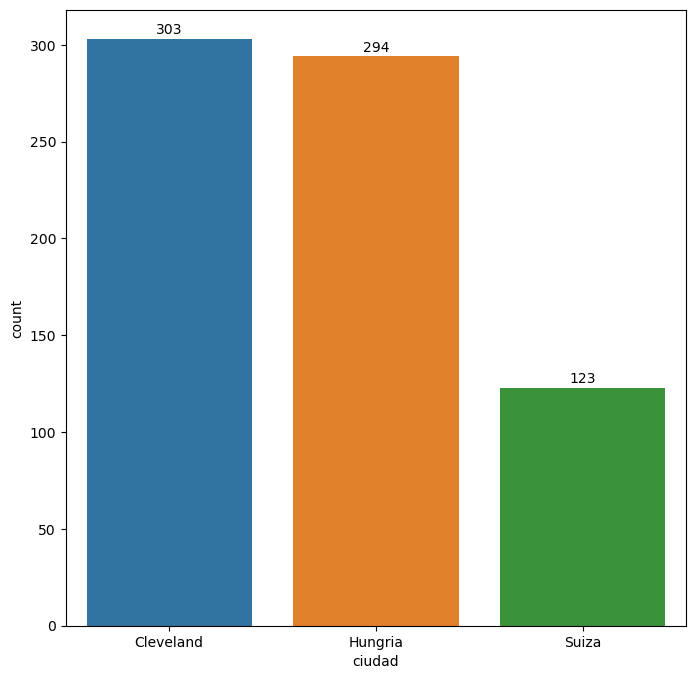

In [19]:
plt.figure(figsize=(8, 8))
sns.countplot(x='ciudad', data=data)

# Agregar etiquetas con las cantidades sobre las barras
for index, value in enumerate(data['ciudad'].value_counts()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.show()

Vemos que la mayoría de los datos son de Cleveland

Vamos a dividir el dataset en tres nuevos dataframe (cada uno de estos tres podría tener características distintas, que tal vez haga que nuestro modelo futuro no pueda obtener tan buenos resultados si es tan general)



In [20]:
dataCleveland=data[data.ciudad=="Cleveland"]
dataHungria=data[data.ciudad=="Hungria"]
dataSuiza=data[data.ciudad=="Suiza"]

### Baseline Cleveland

<Axes: xlabel='target', ylabel='count'>

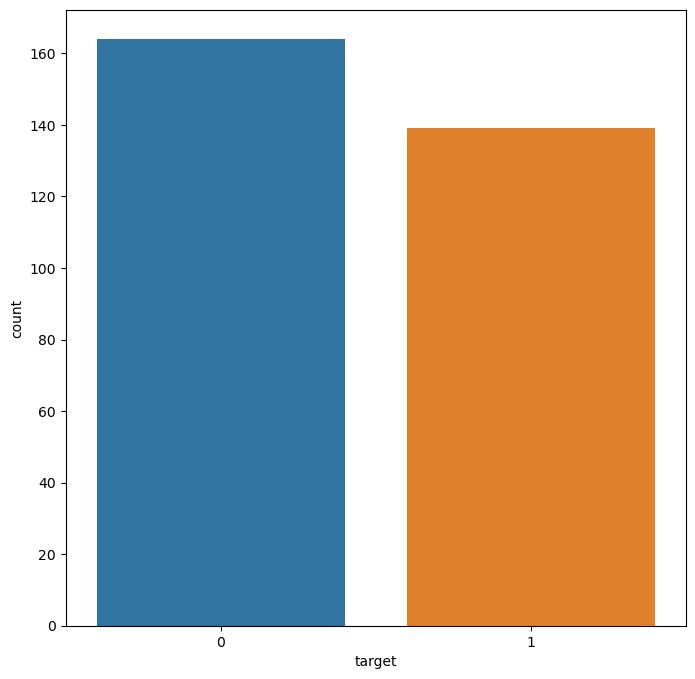

In [21]:
plt.figure(figsize=(8,8))
sns.countplot(x='target',data=dataCleveland)

In [22]:
dataCleveland['target'][dataCleveland['target'] == '0'].count()/dataCleveland.shape[0]*100


54.12541254125413

Podemos observar que el 54% de las personas que viven en Cleveland no tienen problemas del corazón

### Baseline Suiza


<Axes: xlabel='target', ylabel='count'>

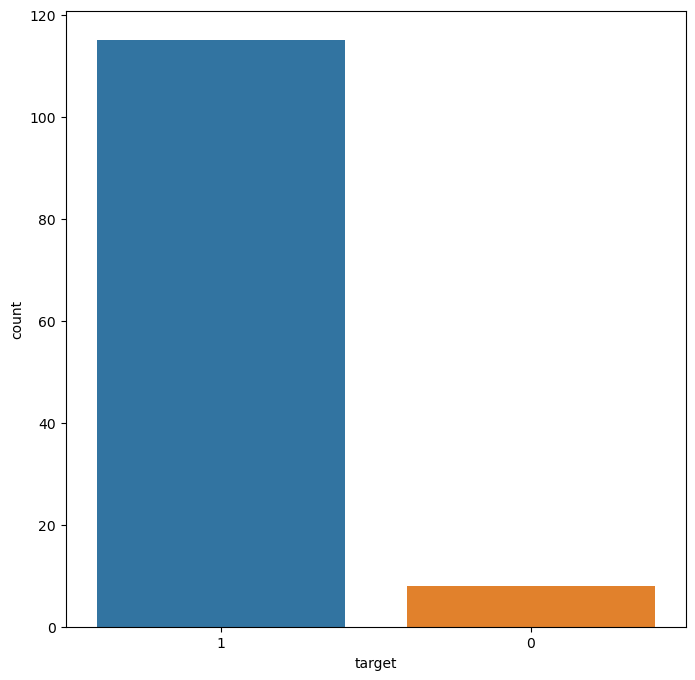

In [24]:
plt.figure(figsize=(8,8))
sns.countplot(x='target',data=dataSuiza)

In [25]:
dataSuiza[dataSuiza['target'] == '1']['target'].count()/dataSuiza.shape[0]*100


93.4959349593496

El baseline de Suiza es que la gente tiene problemas cardíacos en un 93.5%



### Baseline Hungría


<Axes: xlabel='target', ylabel='count'>

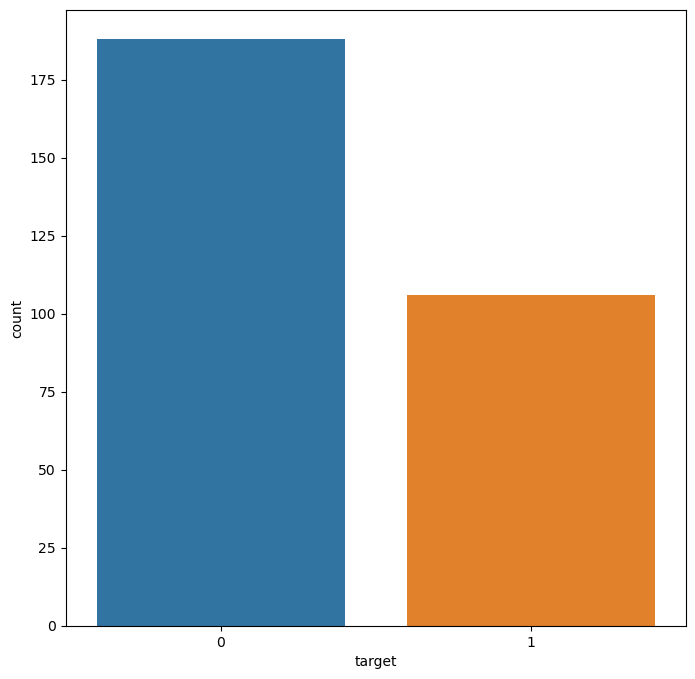

In [26]:
plt.figure(figsize=(8,8))
sns.countplot(x='target',data=dataHungria)

In [31]:
dataHungria.shape[0]

294

In [33]:
dataHungria[dataHungria['target']=='0']['target'].count()/dataHungria.shape[0]

0.6394557823129252

El Baseline para Hungría es que la gente no tienen problemas cardíacos en un 63.95%

Los datasets son bastante diferentes y de pronto no sería bueno utilizarlos conjuntamente. No resulta proudente para diagnosticar un paciente de Cleveland utilizar un modelo aprendido con los tres conjuntos de datos, pues sus niveles de desbalanceo son muy diferentes. La clase positiva tiene una proporción de 46% para Cleveland, 93% para Suiza y de 36% para Hungría.

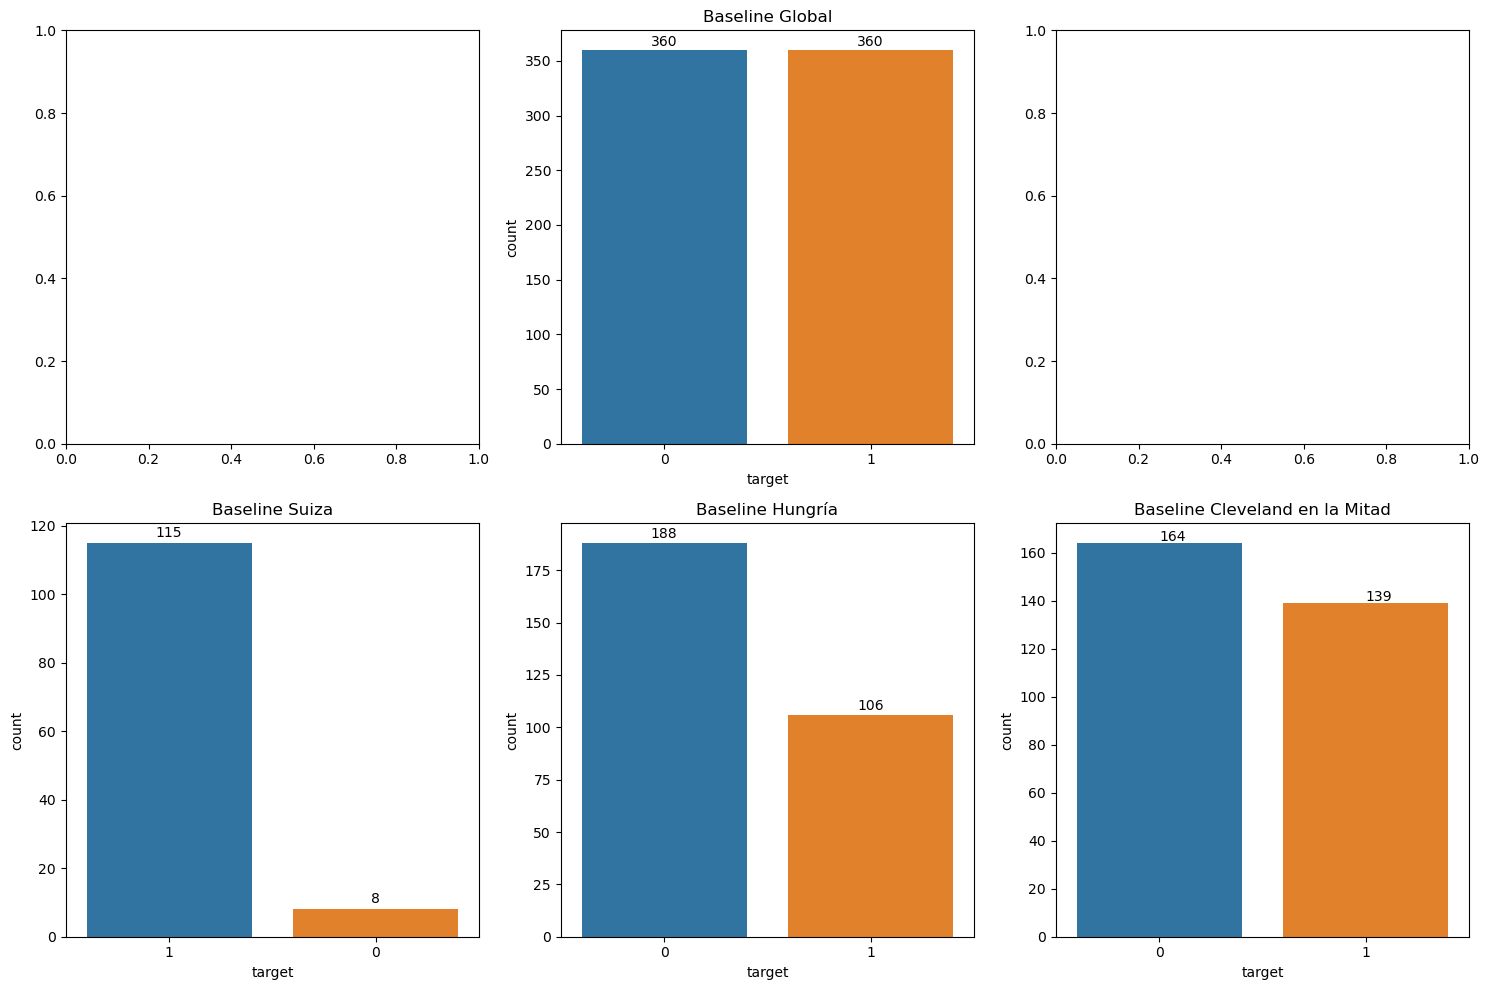

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes tus DataFrames: dataCleveland, dataSuiza, dataHungria, y data

# Crear subgráficos 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Baseline global
sns.countplot(x='target', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Baseline Global')

for index, value in enumerate(data['target'].value_counts()):
    axes[0, 1].text(index, value + 1, str(value), ha='center', va='bottom')

# Baseline Suiza
sns.countplot(x='target', data=dataSuiza, ax=axes[1, 0])
axes[1, 0].set_title('Baseline Suiza')

for index, value in enumerate(dataSuiza['target'].value_counts()):
    axes[1, 0].text(index, value + 1, str(value), ha='center', va='bottom')

# Baseline Hungría
sns.countplot(x='target', data=dataHungria, ax=axes[1, 1])
axes[1, 1].set_title('Baseline Hungría')
#axes[1, 1].text(0, dataHungria[dataHungria['target'] == '0']['target'].count(),
#               f"{dataHungria[dataHungria['target'] == '0']['target'].count() / dataHungria.shape[0] * 100:.2f}% no problemas cardíacos",
#               ha='center', va='bottom')

for index, value in enumerate(dataHungria['target'].value_counts()):
    axes[1, 1].text(index, value + 1, str(value), ha='center', va='bottom')


# Baseline Cleveland
sns.countplot(x='target', data=dataCleveland, ax=axes[1, 2])
axes[1, 2].set_title('Baseline Cleveland en la Mitad')

for index, value in enumerate(dataCleveland['target'].value_counts()):
    axes[1, 2].text(index, value + 1, str(value))


# Ajustes de diseño global
plt.tight_layout()
plt.show()
